<a href="https://colab.research.google.com/github/rahulmalu1998/ECG-preciction/blob/main/LSTM_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
# fix random seed for reproducibility
np.random.seed(7)
# load the dataset
dataframe = read_csv('111.csv', usecols=[1], engine='python')
dataframe=dataframe.iloc[:5000]
dataset = dataframe.values
dataset = dataset.astype('float32')
dataset

array([[1017.],
       [1017.],
       [1017.],
       ...,
       [ 976.],
       [ 972.],
       [ 972.]], dtype=float32)

In [ ]:
dataset
# single exponential smoothing
...
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
# create class
model = SimpleExpSmoothing(dataset)


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
dataset

array([[1017.],
       [1017.],
       [1017.],
       ...,
       [ 976.],
       [ 972.],
       [ 972.]], dtype=float32)

In [ ]:
#normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# print(testX.shape)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# print(testY.shape)
print(trainX[1])
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
print(model.summary())
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])
history=model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)

[[0.4000001 0.4000001 0.4000001 0.4000001 0.4000001 0.4000001 0.4000001
  0.4000001 0.4000001 0.409091 ]]
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 4)                 240       
_________________________________________________________________
dense (Dense)                (None, 1)                 5         
Total params: 245
Trainable params: 245
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
3339/3339 - 6s - loss: 0.0058 - accuracy: 2.9949e-04
Epoch 2/10
3339/3339 - 4s - loss: 9.7963e-04 - accuracy: 2.9949e-04
Epoch 3/10
3339/3339 - 4s - loss: 5.4356e-04 - accuracy: 2.9949e-04
Epoch 4/10
3339/3339 - 4s - loss: 3.7786e-04 - accuracy: 2.9949e-04
Epoch 5/10
3339/3339 - 4s - loss: 3.1705e-04 - accuracy: 2.9949e-04
Epoch 6/10
3339/3339 - 4s - loss: 2.8328e-04 - accuracy: 2.9949e-04
Epoch

{'loss': [0.005809553898870945, 0.0009796270169317722, 0.0005435565253719687, 0.0003778604732360691, 0.00031705066794529557, 0.0002832783793564886, 0.0002523503790143877, 0.00023549214529339224, 0.00021803693380206823, 0.0002030688337981701], 'accuracy': [0.0002994908718392253, 0.0002994908718392253, 0.0002994908718392253, 0.0002994908718392253, 0.0002994908718392253, 0.0002994908718392253, 0.0002994908718392253, 0.0002994908718392253, 0.0002994908718392253, 0.0002994908718392253]}


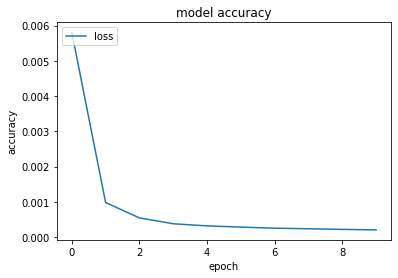

In [ ]:
print(history.history)
# summarize history for accuracy
plt.plot(history.history['loss'])
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper left')
plt.show()

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
# trainPredict = scaler.inverse_transform(trainPredict)
# trainY = scaler.inverse_transform([trainY])
# testPredict = scaler.inverse_transform(testPredict)
# testY = scaler.inverse_transform([testY])
testY=np.reshape(testY, (-1, 1))
testPredict=np.transpose(testPredict)
testY=np.transpose(testY)
print(testY.shape)
print(testPredict.shape)

(1, 1639)
(1, 1639)


In [ ]:
def sMAPE(a, b):
    """
    Calculates sMAPE
    :param a: actual values
    :param b: predicted values
    :return: sMAPE
    """
    a = numpy.reshape(a, (-1,))
    b = numpy.reshape(b, (-1,))
    return numpy.mean(100*2.0 * numpy.abs(a - b) / (numpy.abs(a) + numpy.abs(b))).item()

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
forecast_errors = [testY[:,0][i]-testPredict[:,0][i] for i in range(len(testPredict[:,0]))]
# calculate root mean squared error
# trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
# print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[:,0], testPredict[:,0]))

bias = sum(forecast_errors) * 1.0/len(testPredict[:,0])
print('Bias: %f' % bias)
mae = mean_absolute_error(testY[:,0], testPredict[:,0])
print('MAE: %f' % mae)
print('Test Score(RMSE): %.2f' % (testScore))
mse = mean_squared_error(testY[:,0], testPredict[:,0])
print('MSE: %f' % mse)
mape=sMAPE(testY[:,0], testPredict[:,0])
print('MAPE: %f' %mape)

from sklearn.metrics import accuracy_score
# print(accuracy_score(testY, testPredict, normalize=False))

Bias: -0.006931
MAE: 0.006931
Test Score(RMSE): 0.01
MSE: 0.000048
MAPE: 1.799058


accuracy, precision, recall, auc score

In [ ]:
import numpy as np
testPredict=np.transpose(testPredict)
print(testY.shape, testPredict.shape)

(1, 1639) (1639, 1)


In [ ]:
trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)


(3339, 1)
(1639, 1)


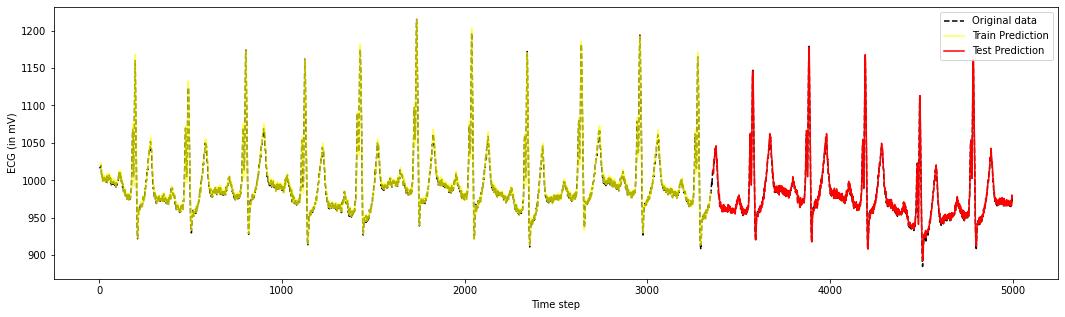

In [ ]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
print(trainPredict.shape)
# testPredictPlot[look_back:len(testPredict)+look_back, :] = testPredict
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1,:] = testPredict
print(testPredict.shape)
# plot baseline and predictions
plt.figure(figsize=(18,5))
plt.plot(scaler.inverse_transform(dataset),color='black',linestyle='--',label='Original data')
# plt.legend()
# plt.show()
# plt.figure(figsize=(18,5))
plt.plot(trainPredictPlot,color='yellow',alpha=0.7,label='Train Prediction')
plt.plot(testPredictPlot,color='red',label='Test Prediction')
plt.xlabel('Time step')
plt.ylabel('ECG (in mV)')
plt.legend()
plt.show()

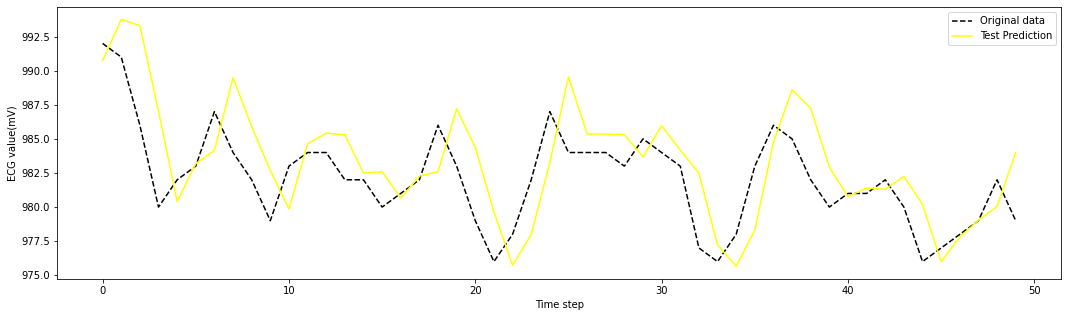

In [ ]:
plt.figure(figsize=(18,5))
d1=scaler.inverse_transform(dataset)
plt.plot(d1[4000:4050],color='black',linestyle='--',label='Original data')
# plt.legend()
# plt.show()
# plt.figure(figsize=(18,5))
# plt.plot(trainPredictPlot[4000:4050],color='yellow',label='Train Prediction')
plt.plot(testPredictPlot[4000:4050],color='yellow',label='Test Prediction')
plt.xlabel('Time step')
plt.ylabel('ECG value(mV)')
plt.legend()
plt.show()